In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris


Bad key "text.kerning_factor" on line 4 in
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


## 1) 載入資料集

In [2]:
iris = load_iris()
df_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


## 2) 切割訓練集與測試集

In [4]:
from sklearn.model_selection import train_test_split
X = df_data.drop(labels=['Species'],axis=1).values # 移除Species並取得剩下欄位資料
y = df_data['Species'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print('train shape:', X_train.shape)
print('test shape:', X_test.shape)

train shape: (105, 4)
test shape: (45, 4)


## 繪製決策邊界 Function

In [5]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx = None, resolution=0.02):
    # setup marker generator and color map
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                            np.arange(x2_min,x2_max,resolution))

    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)

    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y=X[y==cl,1],
            alpha=0.8, c=[cmap(idx)], marker=markers[idx],label=cl)
    if test_idx:
        X_test, y_test = X[test_idx,:], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:,1], c='',
            alpha=1.0, linewidth=1, marker='o',
            s=55, label='test set')


## PCA降維
將原先 iris 4個特徵降成2維，方便做視覺化。

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, iterated_power=1)
train_reduced = pca.fit_transform(X_train)
test_reduced = pca.transform(X_test)

## 分類決策樹
一個決策樹會根據訓練資料自動產生一棵樹。決策樹會根據資料產生很多樹狀的規則，最終訓練出來的規則會對新樣本進行預測。

Parameters:
- criterion: 亂度的評估標準，gini/entropy。預設為gini。
- max_depth: 樹的最大深度。
- splitter: 特徵劃分點選擇標準，best/random。預設為best。
- random_state: 亂數種子，確保每次訓練結果都一樣，splitter=random 才有用。
- min_samples_split: 至少有多少資料才能再分
- min_samples_leaf: 分完至少有多少資料才能分

Attributes:
- feature_importances_: 查詢模型特徵的重要程度。

Methods:
- fit: 放入X、y進行模型擬合。
- predict: 預測並回傳預測類別。
- score: 預測成功的比例。
- predict_proba: 預測每個類別的機率值。
- get_depth: 取得樹的深度。





train set accurancy:  1.0


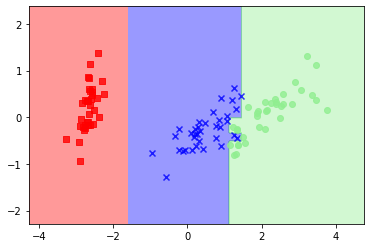

In [15]:
from sklearn.tree import DecisionTreeClassifier

# 建立 DecisionTreeClassifier 模型
decisionTreeModel = DecisionTreeClassifier(criterion = 'entropy', max_depth=6, random_state=42)
# 使用訓練資料訓練模型
decisionTreeModel.fit(train_reduced, y_train)
# 使用訓練資料預測分類
predicted = decisionTreeModel.predict(train_reduced)
# 計算準確率
accuracy = decisionTreeModel.score(train_reduced, y_train)

# 訓練集預測
plot_decision_regions(train_reduced, y_train, decisionTreeModel)
print('train set accurancy: ', accuracy)

test set accurancy:  0.9555555555555556


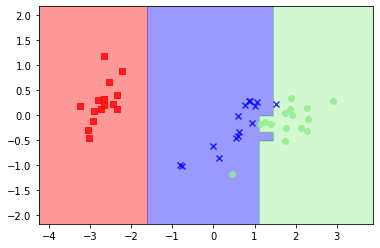

In [16]:
# 測試集預測
plot_decision_regions(test_reduced, y_test, decisionTreeModel)
print('test set accurancy: ',decisionTreeModel.score(test_reduced, y_test))

## 視覺化決策樹
Graphviz 是視覺化決策樹的套件，可參考Graphviz[官網](https://www2.graphviz.org/)的介紹。以下範例一樣用 iris 資料集，並採用四個特徵下去做訓練。

`pip install graphviz`


In [9]:
#create model
decisionTreeModel = DecisionTreeClassifier(criterion = 'gini', max_depth=3 ,random_state=42)
decisionTreeModel.fit(X_train, y_train)

print('train set accurancy: ',decisionTreeModel.score(X_train, y_train))
print('test set accurancy: ',decisionTreeModel.score(X_test, y_test))

train set accurancy:  0.9809523809523809
test set accurancy:  0.9777777777777777


In [10]:
print('特徵重要程度: ',decisionTreeModel.feature_importances_)

特徵重要程度:  [0.         0.         0.55087719 0.44912281]


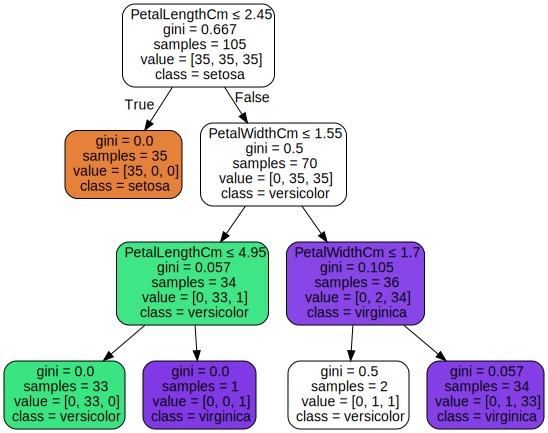

In [11]:
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(decisionTreeModel, out_file=None, 
                         feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
                         class_names=['setosa', 'versicolor', 'virginica'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data) 
graph